# 3.1 Индивидуальное задание

In [182]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [183]:
img = cv2.imread('pic/Ind.jpg',0)
img_cntrs = cv2.imread('pic/Ind.jpg',1)
imag = cv2.imread('pic/Ind.jpg',0)

Получим контур и топологическую структуру изображения:
Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур представляет собой массив numpy, содержащий координаты точек границы объекта (x, y)
Топологической структурой (иерархия) – называется связь одного контура с другим, при помощи иерархии можно определить является ли контур дочерним или родительским по отношению к другому, если это необходимо


In [184]:
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

Отобразим контур

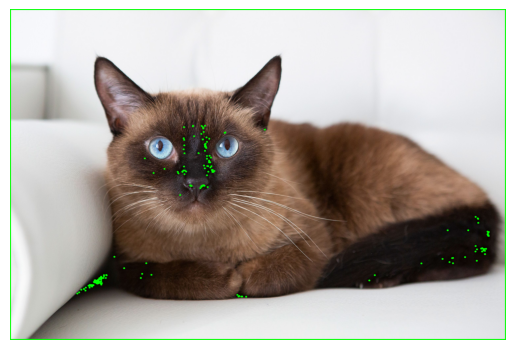

In [185]:
cv2.drawContours(img_cntrs, contours, -1, (0, 255 ,0), 10)
plt.imshow(img_cntrs[...,::-1])
plt.axis("off");

Выделим один внешний контур

In [186]:
cnt = contours[0]

Найдём площадь ограниченную контуром

In [187]:
ar = cv2.contourArea(cnt)
print(ar)

5992002.0


Теперь получим длину контурного периметра

In [188]:
prm = cv2.arcLength(cnt,True)
print(prm)

9994.0


Моменты представляют собой среднее значение интенсивности пикселей изображения.
Найдём их:

In [189]:
M = cv2.moments(cnt)
print(M)

{'m00': 5992002.0, 'm10': 8985006999.0, 'm01': 5986009998.0, 'm20': 17964023993334.0, 'm11': 8976021992001.0, 'm02': 7973365317336.0, 'm30': 4.040558096700613e+16, 'm21': 1.7946059969340664e+16, 'm12': 1.1956061293345332e+16, 'm03': 1.1948087928027998e+16, 'mu20': 4491005998333.5, 'mu11': -0.001953125, 'mu02': 1993341329333.999, 'mu30': -368.0, 'mu21': 3.0, 'mu12': 2.5, 'mu03': 2.0, 'nu20': 0.12508341675008341, 'nu11': -5.439840170123612e-17, 'nu02': 0.055518506168722885, 'nu30': -4.187144458802177e-15, 'nu21': 3.413432982719166e-17, 'nu12': 2.8445274855993046e-17, 'nu03': 2.2756219884794438e-17}


Получим высоту и ширину

In [190]:
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)

0 0 3000 1999


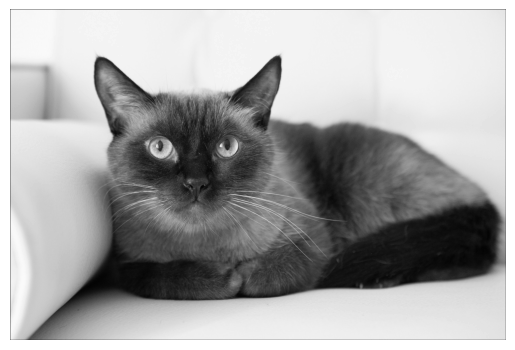

In [191]:
imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imag, 'gray')
plt.axis('off');

Найдём отношение ширины к высоте

In [192]:
asprat = float(w) / h
print(asprat)

1.5007503751875937


Найдём отношение площади контура к площади ограничивающего прямоугольника

In [193]:
rectar = w * h
extent = float(ar)/rectar
print(extent)

0.9991665832916459


Найдём эквивалентный диаметр:

In [194]:
eqdiam = np.sqrt(4*ar/np.pi)
print(eqdiam)

2762.1104066514404


In [195]:
img = cv2. imread('pic/Cat.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

Получим маску изображения

In [196]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))

Максимальное и минимальное значения и их координаты

In [197]:
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

Найдём крайние точки изображения

In [198]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

Средняя интенсивность

In [199]:
meanv = cv2.mean(img,mask = mask)

Ориентация – это угол, под которым направлено выделенное направление изображения. Найдём её

In [200]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)

In [201]:
print(pixpoin)
print(minv, maxv, minl, maxl)
print(leftmost, rightmost, topmost, bottommost)
print(meanv)
print(ang)

[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [763 697]
 [763 698]
 [763 699]]
0.0 255.0 (404, 238) (430, 0)
(0, 0) (699, 0) (0, 0) (699, 763)
(177.39208676140615, 0.0, 0.0, 0.0)
0.0
